Sebastian Berlingieri

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [55]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [57]:
np.random.seed(15)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=10, 
                                   bias = bias, 
                                   random_state=5, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,0.441227,-0.330870,2.430771,-0.252092,0.109610,244.349429
1,1.582481,-0.909232,-0.591637,0.187603,-0.329870,-66.739816
2,-1.192765,-0.204877,-0.358829,0.603472,-1.664789,-154.409110
3,-0.700179,1.151391,1.857331,-1.511180,0.644848,194.236600
4,-0.980608,-0.856853,-0.871879,-0.422508,0.996440,-87.092471
...,...,...,...,...,...,...
295,0.423162,-0.988746,0.741750,1.130381,-0.189154,67.307896
296,-2.075862,-0.911934,0.037560,0.697767,-0.506700,-90.781843
297,1.006915,-0.513603,-1.360830,0.438510,-0.675455,-150.392513
298,1.310846,1.089519,-0.400579,-0.621525,0.217709,11.909130


In [58]:
x_columns = column_names

X = reg_df[x_columns]
y = reg_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model_linreg = LinearRegression()
model_linreg.fit(X_train, y_train) 

y_pred_train = model_linreg.predict(X_train) # Predicts the training data
y_pred_test = model_linreg.predict(X_test) # Predicts the testing data
y_pred = model_linreg.predict(X) # Predicts the entire dataset

MSE_train = sk.metrics.mean_squared_error(y_train, y_pred_train) # Calculates the mean squared error for the training data
R2_train = model_linreg.score(X_train, y_train) # Calculates the R2 score for the training data

MSE_test = sk.metrics.mean_squared_error(y_test, y_pred_test)
R2_test = model_linreg.score(X_test, y_test)

print(f'model coefficients: {model_linreg.coef_[0]}, {model_linreg.intercept_}')
print(f'MSE_test = {MSE_test:.2f}, MSE_train = {MSE_train:.2f}')
print(f'R2_test = {R2_test:.2f}, R2_train = {R2_train:.2f}')

model_linreg.__dict__
print_model(model_linreg.intercept_, model_linreg.coef_, x_columns, 'Model 1')


model coefficients: 21.487112106960772, -6.5065046755284595
MSE_test = 68.25, MSE_train = 103.05
R2_test = 1.00, R2_train = 0.99
Model 1:
 y = -6.51 + 21.49*x1 + 20.94*x2 + 96.08*x3 + 6.82*x4 + 48.66*x5


#### Your written answers here

What are your model parameters?
 -   y = -6.51 + 21.49*x1 + 20.94*x2 + 96.08*x3 + 6.82*x4 + 48.66*x5


What were your MSE and R^2?
 - MSE is 68.25 and R^2 is 1.00



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [59]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

print_model(bias, coef, column_names, model_name = 'True Model')

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


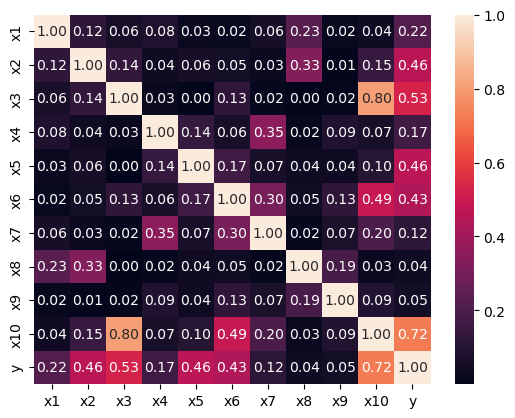

In [60]:
corr = reg2_df.corr()
sns.heatmap(np.abs(corr), annot = True, fmt = '.2f')
plt.show()

In [61]:
X.shape

(300, 10)

In [62]:
candidate_idx = [0, 1, 2, 3, 4, 5, 9]
Z = X[:, candidate_idx]
Z_names = [column_names[idx] for idx in candidate_idx]

Z_names

Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size = 0.2)

modelLR = LinearRegression()
modelLR.fit(Z_train, y_train)

R2_train = modelLR.score(Z_train, y_train)
R2_test = modelLR.score(Z_test, y_test)
MSE_train = sk.metrics.mean_squared_error(y_train, y_pred_train) # Calculates the mean squared error for the training data
MSE_test = sk.metrics.mean_squared_error(y_test, y_pred_test)

print(f'R2_train = {R2_train:.2f}')
print(f'R2_test = {R2_test:.2f}')
print(f'MSE_test = {MSE_test:.2f}, MSE_train = {MSE_train:.2f}')


print_model(modelLR.intercept_, modelLR.coef_, Z_names, 'Model 2')
print_model(bias, coef, column_names, 'True Model')

R2_train = 0.86
R2_test = 0.89
MSE_test = 14369.62, MSE_train = 13789.71
Model 2:
 y = -15.36 + 58.45*x1 + 76.58*x2 + 67.36*x3 + 9.70*x4 + 56.35*x5 + 52.62*x6 + 61.46*x10
True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


#### Your written answers here

What are your model parameters?
 -  y = -15.22 + 61.40*x1 + 77.01*x2 + 67.83*x3 + 5.65*x4 + 54.40*x5 + 52.40*x6 + 61.66*x10


Which features (x1, x2...) were significant? Which were co-linear?
 - x1, x2, x3, x4, x5, x6, x10 are significant. x3 amd x6 are colinear with x10
 
What were your MSE and R^2?
 - MSE = 13866.35 and R^2 = .89



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [63]:
housing_df = pd.read_csv('kc_house_data.csv')
housing_df.drop(['id', 'date', 'zipcode'], axis = 1, inplace = True)
housing_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


<Axes: >

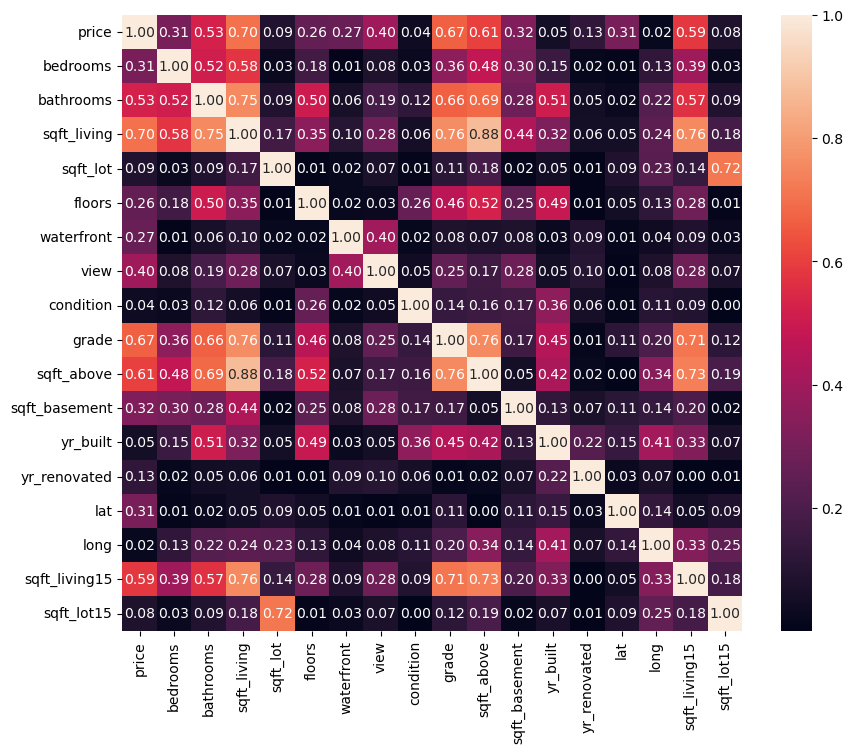

In [64]:
corr = housing_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(np.abs(corr), annot = True, fmt = '.2f')

In [65]:
from sklearn.preprocessing import StandardScaler

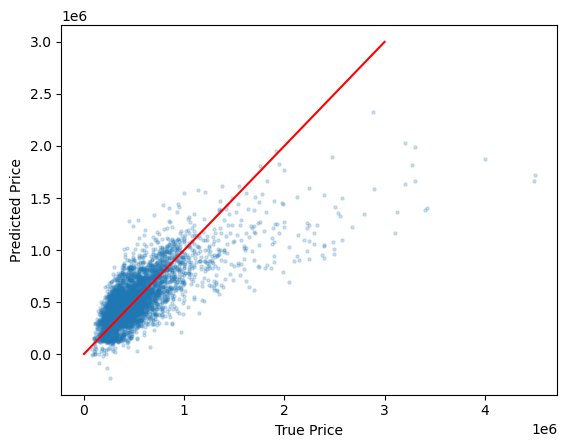

R2 = 0.56


In [66]:
x = housing_df[['sqft_living', 'sqft_above', 'grade']]
y = housing_df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) # Split the data into training and testing data

scaler = StandardScaler()
scaler.fit(x_train) # Fit the scaler to the training data
x_train_scaled = scaler.transform(x_train) # Transform the training data
x_test_scaled = scaler.transform(x_test) # Transform the testing data

model = LinearRegression()
model.fit(x_train_scaled, y_train)
R2 = model.score(x_test_scaled, y_test) # Calculate the R2 score for the testing data

y_pred_test = model.predict(x_test_scaled)

plt.scatter(y_test, y_pred_test, s = 5, alpha = 0.2)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.plot([0, 3000000], [0, 3000000], color = 'red')
plt.show()

print(f'R2 = {R2:.2f}')

#### Your written answers here
Which features are you using and why?
 
 - I will be using grade, sqft_living, and sqft_above as my features since these three have the highest correlation with the output of price.
 - R^2 is 0.54

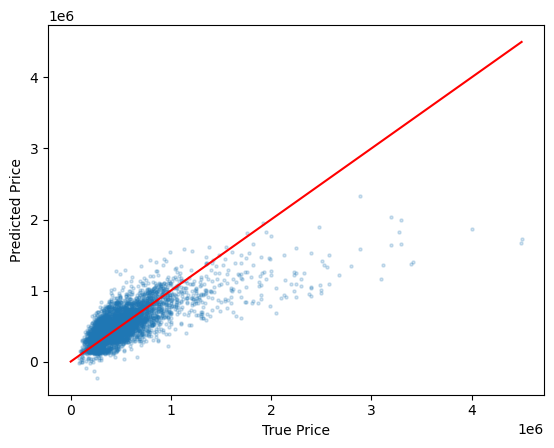

In [68]:
plt.scatter(y_test, y_pred_test, s=5, alpha=0.2)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red')
plt.show()

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

In [ ]:
from sklearn.linear_model import Ridge

X = housing_df.drop(columns=['price'])
y = housing_df['price']
feature_names = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(feature_names)


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [71]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1000)
ridge_model.fit(X_train, y_train)

R2_train = ridge_model.score(X_train, y_train)
ridge_model = Ridge(alpha=1000)
ridge_model.fit(X_train, y_train)

R2_train = ridge_model.score(X_train, y_train)
R2_test = ridge_model.score(X_test, y_test)

print(f'R2_train = {R2_train:.2f}')
print(f'R2_test = {R2_test:.2f}')


R2_train = 0.66
R2_test = 0.65


In [ ]:
coefficients = ridge_model.coef_
top_3_indices = np.argsort(np.abs(coefficients))[-3:]
top_3_features = feature_names[top_3_indices]
print("Top 3 features with the biggest coefficients:", top_3_features)
print("Their coefficients:", coefficients[top_3_indices])

Top 3 features with the biggest coefficients: Index(['view', 'grade', 'lat'], dtype='object')
Their coefficients: [ 62045.94425207 100176.96771867 128521.00193072]


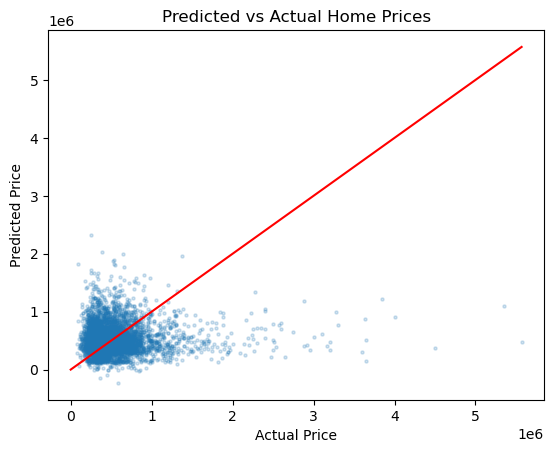

In [ ]:
plt.scatter(y_test, y_pred_test, s=5, alpha=0.2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red')
plt.title('Predicted vs Actual Home Prices')
plt.show()


### Your written answers here
Which regression did you use?
 - Ridge 
Does your regularized model look better than your MLR? How so?
 - No since it looks as though there's a lot more noise in the regularized than in the MLR so the line isn't as fit.

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

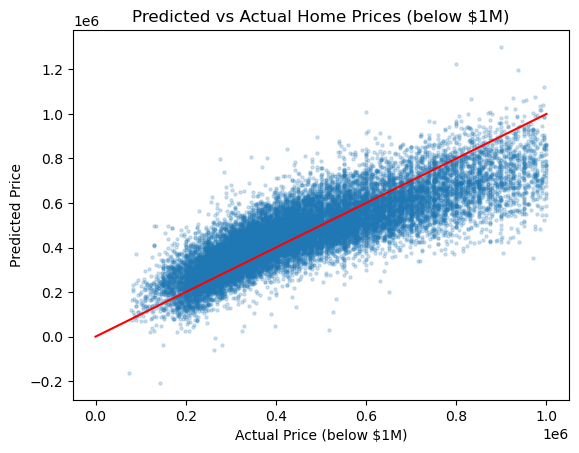

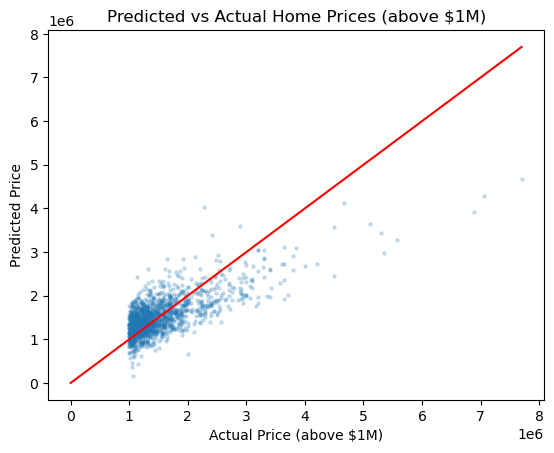

In [ ]:
from sklearn.linear_model import Lasso

below_1M = housing_df[housing_df['price'] < 1000000]
above_1M = housing_df[housing_df['price'] >= 1000000]
# Split data into features and target
X_below_1M = below_1M.drop(columns=['price'])
y_below_1M = below_1M['price']
X_above_1M = above_1M.drop(columns=['price'])
y_above_1M = above_1M['price']

# Standardize the features
scaler_below_1M = StandardScaler()
X_below_1M_scaled = scaler_below_1M.fit_transform(X_below_1M)

scaler_above_1M = StandardScaler()
X_above_1M_scaled = scaler_above_1M.fit_transform(X_above_1M)

# Fit Lasso model for below $1M
lasso_below_1M = Lasso(alpha=1000)
lasso_below_1M.fit(X_below_1M_scaled, y_below_1M)

# Fit Lasso model for above $1M
lasso_above_1M = Lasso(alpha=1000)
lasso_above_1M.fit(X_above_1M_scaled, y_above_1M)

# Predict and plot for below $1M
y_pred_below_1M = lasso_below_1M.predict(X_below_1M_scaled)
plt.scatter(y_below_1M, y_pred_below_1M, s=5, alpha=0.2)
plt.xlabel('Actual Price (below $1M)')
plt.ylabel('Predicted Price')
plt.plot([0, max(y_below_1M)], [0, max(y_below_1M)], color='red')
plt.title('Predicted vs Actual Home Prices (below $1M)')
plt.show()

# Predict and plot for above $1M
y_pred_above_1M = lasso_above_1M.predict(X_above_1M_scaled)
plt.scatter(y_above_1M, y_pred_above_1M, s=5, alpha=0.2)
plt.xlabel('Actual Price (above $1M)')
plt.ylabel('Predicted Price')
plt.plot([0, max(y_above_1M)], [0, max(y_above_1M)], color='red')
plt.title('Predicted vs Actual Home Prices (above $1M)')
plt.show()

In [79]:
R2_below_1M = lasso_below_1M.score(X_below_1M_scaled, y_below_1M)
R2_above_1M = lasso_above_1M.score(X_above_1M_scaled, y_above_1M)

print(f'R^2 for below $1M: {R2_below_1M:.2f}')
print(f'R^2 for above $1M: {R2_above_1M:.2f}')

R^2 for below $1M: 0.69
R^2 for above $1M: 0.52


<Your written answers>

 ### Your written answers here

 What are the $R^2$ for the two models?

  - The $R^2$ for the model showing houses above $1 million is 0.52
  - The $R^2$ for the model showing houses below $1 million is 0.69
 
